$$
In\;the\;nome\;of\;God
$$

# Problem1

$$
we've\;decided\;not\;to\;use\;the\;inference\;system\;to\;figure\;out
\\what'd\;happen\;down\;the\;hill
$$

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

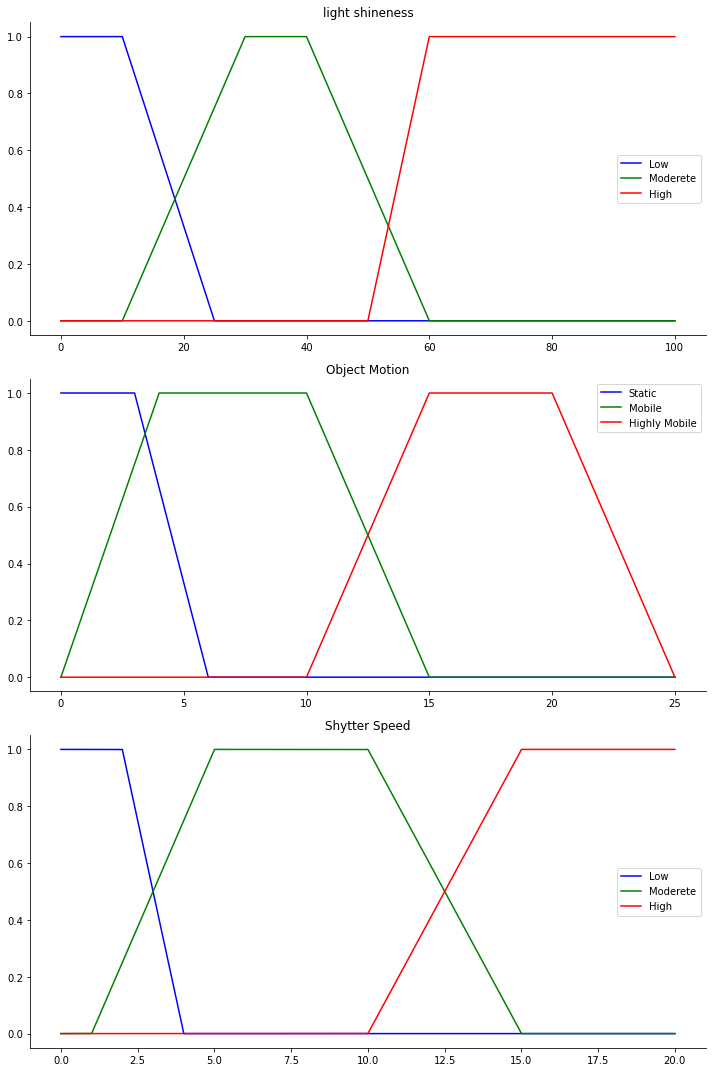

In [15]:
# Generate universe variables
#sources: "https://github.com/scikit-fuzzy/scikit-fuzzy/blob/master/skfuzzy/membership/generatemf.py"

#   * Light on subjective ranges [0, 100]
#   * Motion on subjective ranges [0, 25] in units of percentage points
#   * Shutter Speed has a range of [0, 20] in small steps (due to the data)
x_light = np.arange(0, 101, 1)
x_motion = np.arange(0, 26, 1)
x_ss  = np.arange(0, 20, 0.0001)                                        

# Generate fuzzy membership functions
light_lo = fuzz.trapmf(x_light, [0, 0, 10, 25])
light_md = fuzz.trapmf(x_light, [10, 30, 40, 60])
light_hi = fuzz.trapmf(x_light, [50, 60, 100, 100])

motion_st = fuzz.trapmf(x_motion, [0, 0, 3, 6])
motion_mo = fuzz.trapmf(x_motion, [0, 4, 10, 15])
motion_hi = fuzz.trapmf(x_motion, [10, 15, 20, 25])

ss_lo = fuzz.trapmf(x_ss, [0, 0, 2, 4])
ss_md = fuzz.trapmf(x_ss, [1, 5, 10, 15])
ss_hi = fuzz.trapmf(x_ss, [10, 15, 20, 20])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 15))

ax0.plot(x_light, light_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_light, light_md, 'g', linewidth=1.5, label='Moderete')
ax0.plot(x_light, light_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('light shineness')
ax0.legend()

ax1.plot(x_motion, motion_st, 'b', linewidth=1.5, label='Static')
ax1.plot(x_motion, motion_mo, 'g', linewidth=1.5, label='Mobile')
ax1.plot(x_motion, motion_hi, 'r', linewidth=1.5, label='Highly Mobile')
ax1.set_title('Object Motion')
ax1.legend()

ax2.plot(x_ss, ss_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_ss, ss_md, 'g', linewidth=1.5, label='Moderete')
ax2.plot(x_ss, ss_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Shytter Speed')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

$$
IF<FP_{1}>THEN<FP{2}>ELSE<NOTHING>
\\\mu_{Q_{MM}}(x,y)=min[\mu_{FP_{1}}(x),\mu_{FP_{2}}(y)]
\\\mu_{Q_{MP}}(x,y)=\mu_{FP_{1}}(x)\mu_{FP_{2}}(y)
\\\;
\\IF<FP_{1}>THEN<FP{2}>
\\\mu_{Q_{Z}}(x,y)=max[min(\mu_{FP_{1}}(x),\mu_{FP_{2}}(y)),1-\mu_{FP_{1}}(x)]=max[\mu_{Q_{MM}}(x,y),1-\mu_{FP_{1}}(x)]
$$

$$
\mu_{B'}(y)=\sup_{x\in U}\;t[\mu_{A'}(x),\mu_{Q}(x,y)]
\\using\;mamdani\;minimum\;and\;singlton\;input\;we\;have\:
\\\mu_{B'}(y)=min[\mu_{A}(x_0),\mu_{B}(y)]
$$

In [12]:
x = 0; y = 1
type(fuzz.interp_membership(x_light, light_lo, 15))

numpy.float64

In [13]:
c = np.float64(3)
a = np.array([1,3,45,6])
f = np.fmax(c, a)
f

array([ 3.,  3., 45.,  6.])

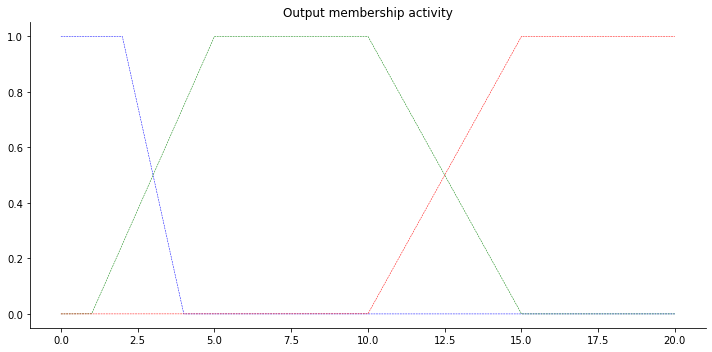

In [38]:
#Generating Rules:
#Suppose 
l = 100; m = 22
# We need the activation of our fuzzy membership functions at these values.
# The exact values 0 and 1 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
light_level_lo = fuzz.interp_membership(x_light, light_lo, l)
light_level_md = fuzz.interp_membership(x_light, light_md, l)
light_level_hi = fuzz.interp_membership(x_light, light_hi, l)

motion_level_st = fuzz.interp_membership(x_motion, motion_st, m)
motion_level_mo = fuzz.interp_membership(x_motion, motion_mo, m)
motion_level_hi = fuzz.interp_membership(x_motion, motion_hi, m)

# Now we take our rules and apply them. Rule 1 concerns low light AND static motion.
# The AND operator means we take the minimum of these two.
active_rule1 = np.fmin(light_level_lo, motion_level_st)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
ss_activation_lo = np.fmin(active_rule1, ss_lo)  # removed entirely to 0

# For rule 2 & 3 :
active_rule2 = np.fmin(light_level_md, motion_level_st)
ss_activation_md2 = np.fmin(active_rule2, ss_md)

active_rule3 = np.fmin(light_level_hi, motion_level_st)
ss_activation_hi3 = np.fmin(active_rule3, ss_hi)

active_rule4 = np.fmin(light_level_lo, motion_level_mo)
ss_activation_md4 = np.fmin(active_rule4, ss_md)

active_rule5 = np.fmin(light_level_md, motion_level_mo)
ss_activation_hi5 = np.fmin(active_rule5, ss_hi)

active_rule6 = np.fmin(light_level_hi, motion_level_hi)
ss_activation_hi6 = np.fmin(active_rule5, ss_hi)

active_rule7 = np.fmin(light_level_lo, motion_level_hi)
ss_activation_md7 = np.fmin(active_rule7, ss_md)

active_rule8 = np.fmin(light_level_md, motion_level_hi)
ss_activation_hi8 = np.fmin(active_rule8, ss_hi)

active_rule9 = np.fmin(light_level_hi, motion_level_mo)
ss_activation_md9 = np.fmin(active_rule9, ss_md)

ss_activation_md = np.fmax(np.fmax(ss_activation_md2, ss_activation_md4), np.fmax(ss_activation_md7, ss_activation_md9))

ss_activation_hi = np.fmax(np.fmax(ss_activation_hi3, ss_activation_hi5), np.fmax(ss_activation_hi6, ss_activation_hi8))

ss0 = np.zeros_like(x_ss)

# Visualize this
fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.fill_between(x_ss, ss0, ss_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_ss, ss_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_ss, ss0, ss_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_ss, ss_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_ss, ss0, ss_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_ss, ss_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [35]:
# Aggregate all three output membership functions together
aggregate = np.fmax(np.fmax(ss_activation_lo, ss_activation_md), ss_activation_hi)


# Calculate defuzzified result
ss = fuzz.defuzz(x_ss, aggregate, 'centroid')
ss_activation = fuzz.interp_membership(x_ss, aggregate, ss)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.plot(x_ss, ss_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_ss, ss_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_ss, ss_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_ss, ss0, aggregate, facecolor='Orange', alpha=0.7)
ax0.plot([ss, ss], [0, ss_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

AssertionError: Total area is zero in defuzzification!